In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
import seaborn as sns
import numpy as np

In [100]:
titanic_data = pd.read_csv('/Users/artemarhipov/Downloads/titanic/train.csv')
check_data = pd.read_csv('/Users/artemarhipov/Downloads/titanic/test.csv')
survived = pd.read_csv('/Users/artemarhipov/Downloads/titanic/gender_submission.csv')

In [101]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [103]:
X = titanic_data.drop(['Survived', 'PassengerId' , 'Name', 'Ticket', 'Cabin'], axis = 1)
X = pd.get_dummies(X)
X = X.fillna({'Age' : X.Age.median()})

In [104]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [105]:
y = titanic_data.Survived

In [106]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [107]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf.fit(X_train,y_train)

In [110]:
clf.score(X_train,y_train)

0.8238255033557047

In [111]:
clf.score(X_test,y_test)

0.8203389830508474

In [112]:
depths = range(1,100)
values = pd.DataFrame()
for depth in depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth)  
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    temp_data = pd.DataFrame({'depth' : [depth], 'train' : [train_score], 'test':[test_score]})
    values = values.append(temp_data)
values

,depth,train,test
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780
...,...,...,...
0,95,0.979866,0.755932
0,96,0.979866,0.776271
0,97,0.979866,0.776271
0,98,0.979866,0.783051


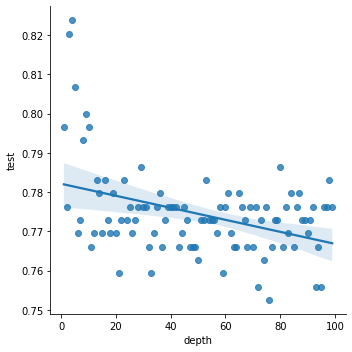

In [113]:
sns.lmplot(x = 'depth', y = 'test', data =values)

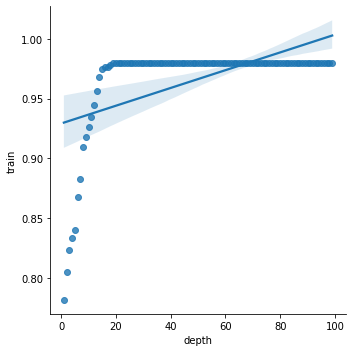

In [114]:
sns.lmplot(x = 'depth', y = 'train', data =values)

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)  

In [117]:
cross_val_score(clf,X_train,y_train,cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [118]:
cross_val_score(clf,X_train,y_train,cv=5).mean()

0.7886274509803922

In [119]:
depths = range(1,100)
values = pd.DataFrame()
for depth in depths:
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=depth)  
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    cross_val = cross_val_score(clf,X_train,y_train,cv=5).mean()
    temp_data = pd.DataFrame({'depth' : [depth], 'train' : [train_score], 'test':[test_score], 'cross_val' : [cross_val]})
    values = values.append(temp_data)
values

,depth,train,test,cross_val
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392
...,...,...,...,...
0,95,0.979866,0.772881,0.766821
0,96,0.979866,0.776271,0.778571
0,97,0.979866,0.772881,0.770196
0,98,0.979866,0.762712,0.766821


In [120]:
values.head(12)

,depth,train,test,cross_val
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392
0,6,0.867450,0.766102,0.805434
0,7,0.882550,0.772881,0.795336
0,8,0.907718,0.786441,0.802045
0,9,0.917785,0.810169,0.798669
0,10,0.926174,0.786441,0.802031


In [121]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)  


In [122]:
cross_val_score(clf,X_test,y_test,cv=5).mean()

0.7864406779661017

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
clf = tree.DecisionTreeClassifier()

In [125]:
clf

DecisionTreeClassifier()

In [126]:
parametrs = {'criterion':['gini','entropy'], 'max_depth':range(1,30)}

In [127]:
grid_search_cv_clf = GridSearchCV(clf,parametrs,cv = 5)

In [128]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [129]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [130]:
grid_search_cv_clf.best_score_

0.8104341736694678

In [131]:
best_clf = grid_search_cv_clf.best_estimator_

In [132]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [133]:
from sklearn.metrics import precision_score, recall_score

In [134]:
pr_1 = precision_score(y_test,best_clf.predict(X_test))
pr_1

0.7547169811320755

In [135]:
recall_score(y_test,best_clf.predict(X_test))

0.6666666666666666

In [137]:
y_predicted = best_clf.predict(X_test)
metrics.f1_score(y_test,y_predicted)

0.7079646017699115

In [139]:
y_predicted_prob = best_clf.predict_proba(X_test)

<AxesSubplot:>

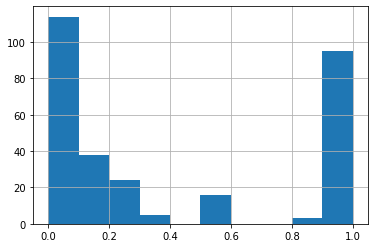

In [140]:
pd.Series(y_predicted_prob[:,1]).hist()

In [141]:
y_new_pred = np.where(y_predicted_prob[:,1] > 0.95,1,0)

In [142]:
precision_score(y_test,y_new_pred)

0.8

In [143]:
recall_score(y_test,y_new_pred)

0.6333333333333333

In [144]:
clf2 = tree.DecisionTreeClassifier()
params = {'max_depth': range(1,50), 'min_samples_split' : range(1,50), 'min_samples_split':range(1,50)}

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
grid_search_cv_clf2 = RandomizedSearchCV(clf2,params,cv = 5)

In [147]:
grid_search_cv_clf2.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': range(1, 50),
                                        'min_samples_split': range(1, 50)})

In [148]:
grid_search_cv_clf2.best_score_

0.7987394957983194

In [149]:
grid_search_cv_clf2.best_params_

{'min_samples_split': 15, 'max_depth': 10}

In [150]:
best_clf2 = grid_search_cv_clf2.best_estimator_

In [154]:
predicted2 = best_clf2.predict(X_test)

In [155]:
from sklearn import metrics

In [156]:
metrics.f1_score(y_test,predicted2)

0.7155963302752293